# Visualization of EventBrite data: bar charts

In [82]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
df = pd.read_csv("../data/eventbrite.csv")

In [84]:
df.head()

,event,event_date,year,org_id,name,email,affiliation,Affiliation_type.y,car1,car2,...,created,event_type,event_level,event_focus,ticket_type,order_id,id,event_id,venue_id,uri
0,4th National eScience Symposium - Science in a...,2016-10-13T09:30:00,2016,NLeSc,Marco de Vos,devos@astron.nl,ASTRON,Research institute,NaN,NaN,...,2016-05-20T09:54:13Z,eScience Symposium,Other,Other,Regular,520207803,655709628,24158128613,14338260.0,https://www.eventbriteapi.com/v3/events/241581...
1,4th National eScience Symposium - Science in a...,2016-10-13T09:30:00,2016,NLeSc,Gert Kruithof,kruithof@astron.nl,ASTRON,Research institute,NaN,NaN,...,2016-05-23T07:41:59Z,eScience Symposium,Other,Other,Early Bird,520781005,656441065,24158128613,14338260.0,https://www.eventbriteapi.com/v3/events/241581...
2,4th National eScience Symposium - Science in a...,2016-10-13T09:30:00,2016,NLeSc,Emma Beauxis-Aussalet,emalb@cwi.nl,CENTRUM WISKUNDE & INFORMATICA,Research institute,NaN,NaN,...,2016-05-19T11:37:38Z,eScience Symposium,Other,Other,Student,519898955,655325883,24158128613,14338260.0,https://www.eventbriteapi.com/v3/events/241581...
3,4th National eScience Symposium - Science in a...,2016-10-13T09:30:00,2016,NLeSc,Vyacheslav Tykhonov,vyacheslav.tykhonov@dans.knaw.nl,DANS-KNAW,Research institute,NaN,NaN,...,2016-05-20T10:30:16Z,eScience Symposium,Other,Other,Early Bird,520212788,655715811,24158128613,14338260.0,https://www.eventbriteapi.com/v3/events/241581...
4,4th National eScience Symposium - Science in a...,2016-10-13T09:30:00,2016,NLeSc,Romulo Goncalves,r.goncalves@esciencecenter.nl,ESCIENCE CENTER,eScience Center,NaN,NaN,...,2016-05-19T11:39:03Z,eScience Symposium,Other,Other,Regular,519899181,655326149,24158128613,14338260.0,https://www.eventbriteapi.com/v3/events/241581...


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   event               1006 non-null   object 
 1   event_date          1006 non-null   object 
 2   year                1006 non-null   int64  
 3   org_id              1006 non-null   object 
 4   name                1006 non-null   object 
 5   email               1006 non-null   object 
 6   affiliation         754 non-null    object 
 7   Affiliation_type.y  737 non-null    object 
 8   car1                404 non-null    object 
 9   car2                50 non-null     object 
 10  eSc_collab          377 non-null    object 
 11  ERCdis              537 non-null    object 
 12  NLeScdis            537 non-null    object 
 13  dis1                571 non-null    object 
 14  dis2                242 non-null    object 
 15  dis3                115 non-null    object 
 16  dis4  

## Bar charts

#### Bar chart function

In [142]:
# Define function for bar plot

def barplot(df, x_column, y_column):
    sns.set()
    sns.set_style('white')
    f, ax = plt.subplots(figsize=(8,6))
    sns.barplot(x=x_column, y=y_column, data=df, color='deepskyblue')
    ax.tick_params(axis='both', which='major', labelsize=14)
    plt.xlabel(x_column, fontsize=16)
    plt.ylabel(y_column, fontsize=16)
    plt.suptitle(y_column + ' by ' + x_column, fontsize=18)
    sns.despine()
    
    return plt.show()


#### Horizontal bar chart function

In [146]:
# Define function for horizontal bar plot

def barplot_horiz(df, x_column, y_column):
    sns.set()
    sns.set_style('white')
    f, ax = plt.subplots(figsize=(8,6))
    sns.barplot(x=x_column, y=y_column, data=df, color='deepskyblue')
    ax.tick_params(axis='both', which='major', labelsize=14)
    plt.xlabel(x_column, fontsize=16)
    plt.ylabel("", fontsize=16)
    plt.suptitle(x_column + ' by ' + y_column, fontsize=18)
    sns.despine()
    
    return plt.show()


#### Participants by year

In [122]:
# filter out escience employees
df_external = df[df['affiliation'] != 'ESCIENCE CENTER']
df_external['affiliation'].value_counts()

TU DELFT              77
UVA                   60
VU AMSTERDAM          49
UTRECHT UNIVERSITY    48
LEIDEN UNIVERSITY     31
                      ..
WESTERN UNIVERSITY     1
ROBOVALLEY             1
NOKIA                  1
MAASTRO CLINIC         1
BELASTINGDIENST        1
Name: affiliation, Length: 84, dtype: int64

In [124]:
# Create df with participants by year

df_participants_by_year = df_external.groupby('year').agg({'order_id': 'count'}).reset_index()
df_participants_by_year.rename(columns = {'order_id': 'participants'}, inplace = True)
df_participants_by_year.head()

,year,participants
0,2016,29
1,2017,160
2,2018,67
3,2019,50
4,2020,239


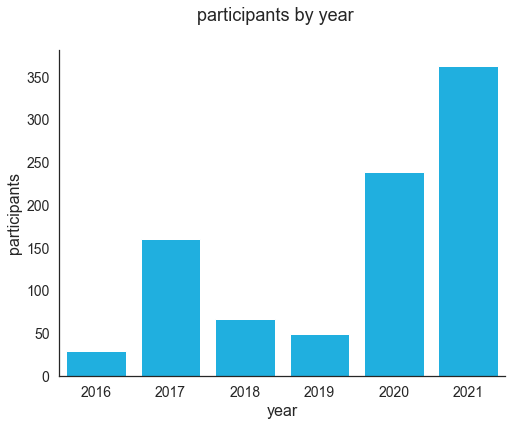

In [135]:
# plot participants by year
barplot(df_participants_by_year, 'year', 'participants')

#### Digital skills: participants by year 

In [126]:
# select digital skills events only

# only escience events
df_escience = df_external[(df_external['org_id'] == 'NLeSc') | (df_external['org_id'] == 'ePlan')]

# filter out the escience symposia
df_digitalskills = df_escience[df_escience['event'].str.contains('Symposium') == False]

df_digitalskills['org_id'].value_counts()

NLeSc    653
ePlan     35
Name: org_id, dtype: int64

In [127]:
# Create df with NL-RSE participants by year

df_digitalskills_participants_by_year = df_digitalskills.groupby('year').agg({'org_id': 'count'}).reset_index()
df_digitalskills_participants_by_year.rename(columns = {'org_id': 'participants'}, inplace = True)
df_digitalskills_participants_by_year.head()


,year,participants
0,2017,104
1,2018,67
2,2019,44
3,2020,182
4,2021,291


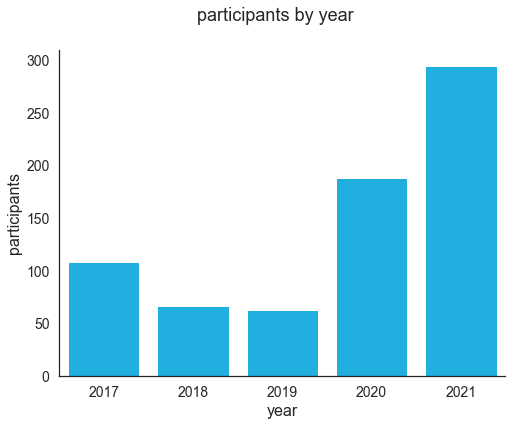

In [105]:
# plot participants by year for digital skills events

barplot(df_digitalskills_participants_by_year, 'year', 'participants')

#### NL-RSE: participants by year 

In [128]:
# only NL-RSE events
df_nlrse = df_external[df_external['org_id'] == 'NL-RSE']
df_nlrse['org_id'].value_counts()

NL-RSE    129
Name: org_id, dtype: int64

In [129]:
# Create df with NL-RSE participants by year
df_nlrse_participants_by_year = df_nlrse.groupby('year').agg({'order_id': 'count'}).reset_index()
df_nlrse_participants_by_year.rename(columns = {'order_id': 'participants'}, inplace = True)
df_nlrse_participants_by_year.head()

,year,participants
0,2020,57
1,2021,72


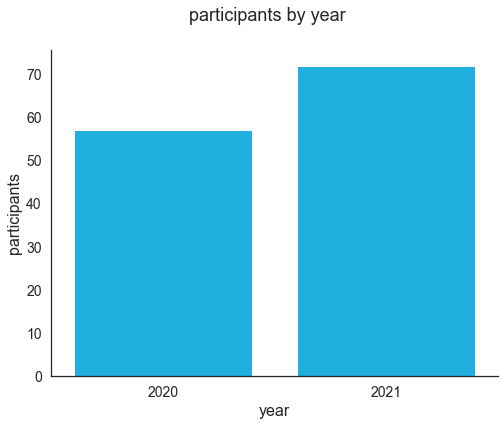

In [130]:
# plot participants by year for NL-RSE events

barplot(df_nlrse_participants_by_year, 'year', 'participants')

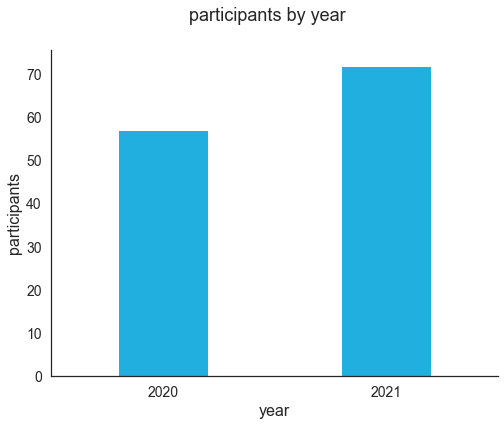

In [131]:
# adjust column width

sns.set()
sns.set_style('white')
f, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='year', y='participants', data=df_nlrse_participants_by_year, color='deepskyblue')
ax.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('year', fontsize=16)
plt.ylabel('participants', fontsize=16)
plt.suptitle('participants by year', fontsize=18)
sns.despine()

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # change the bar width
        patch.set_width(new_value)

        # recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .40)
plt.show()

#### Participants by affiliation type

In [148]:
# Create df with participants by affiliation type

df_participants_by_affl = pd.DataFrame(df['Affiliation_type.y'].value_counts())
df_participants_by_affl.reset_index (inplace = True)
df_participants_by_affl.rename(columns = {'index': 'affiliation type', 'Affiliation_type.y': 'participants'}, inplace = True)
df_participants_by_affl.head()

,affiliation type,participants
0,University,447
1,eScience Center,98
2,Research institute,55
3,University Medical Center,48
4,Research Institute,31


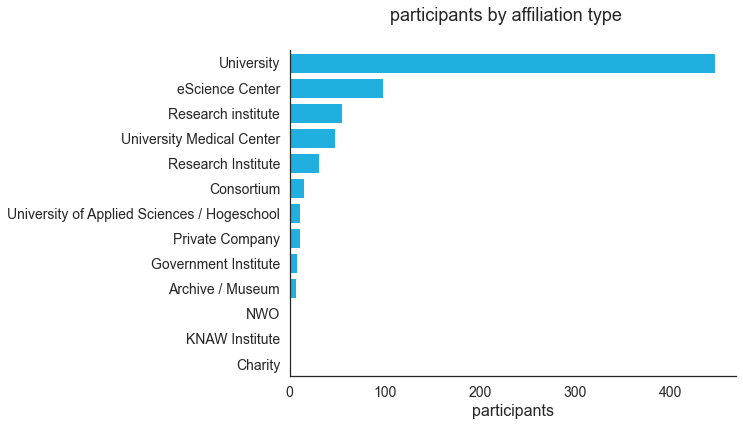

In [149]:
# Create horizontal bar chart 

barplot_horiz(df_participants_by_affl, 'participants', 'affiliation type')

### <span style='background:yellow'> TO DO: FIX AFFILIATION TYPE NAMES: Research institute (capital inconsistent), NWO & KNAW </span>

In [151]:
# Excluding participants from eScience Center
# Create df with participants by affiliation type

df_participants_by_affl = pd.DataFrame(df_external['Affiliation_type.y'].value_counts())
df_participants_by_affl.reset_index (inplace = True)
df_participants_by_affl.rename(columns = {'index': 'affiliation type', 'Affiliation_type.y': 'participants'}, inplace = True)
df_participants_by_affl.head()

,affiliation type,participants
0,University,447
1,Research institute,55
2,University Medical Center,48
3,Research Institute,31
4,Consortium,15


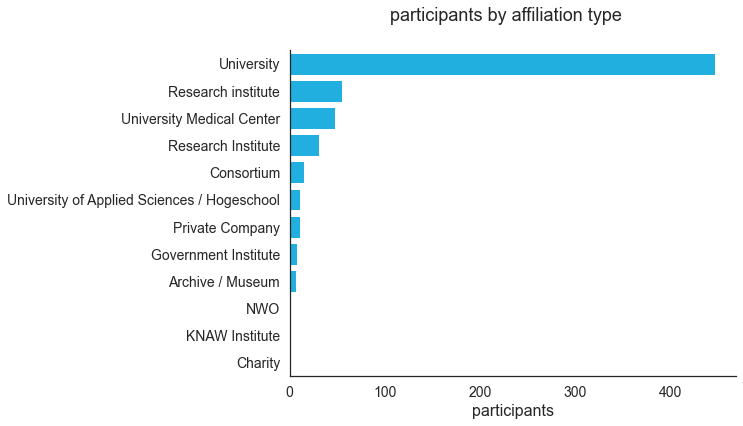

In [152]:
# Create horizontal bar chart 

barplot_horiz(df_participants_by_affl, 'participants', 'affiliation type')

#### Participants by disciplinary section

In [153]:
# Create df with participants by disciplinary section
# quite a lot of missing data but that's because of the eventbrite forms of some of the events

df_participants_by_section = pd.DataFrame(df['NLeScdis'].value_counts())
df_participants_by_section.reset_index (inplace = True)
df_participants_by_section.rename(columns = {'index': 'disciplinary section', 'NLeScdis': 'participants'}, inplace = True)
df_participants_by_section.head()

,disciplinary section,participants
0,Ph&B,215
1,LS,213
2,SSH,81
3,SE,28


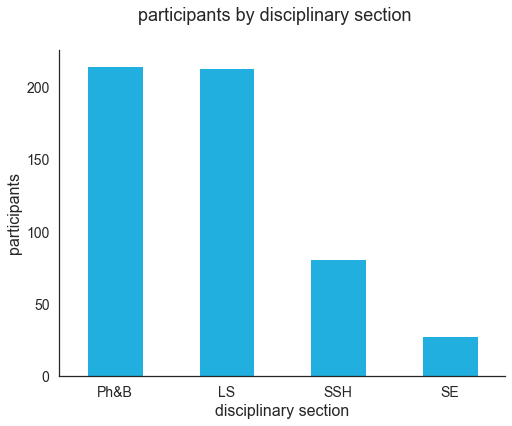

In [159]:
# create bar chart with adjusted column width

# adjust column width

sns.set()
sns.set_style('white')
f, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='disciplinary section', y='participants', data=df_participants_by_section, color='deepskyblue')
ax.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('disciplinary section', fontsize=16)
plt.ylabel('participants', fontsize=16)
plt.suptitle('participants by disciplinary section', fontsize=18)
sns.despine()

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # change the bar width
        patch.set_width(new_value)

        # recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .50)
plt.show()


### <span style='background:yellow'> TO DO: FIX SECTION NAMES TO BE WRITTEN OUT FULLY </span>

A horizontal bar chart will be more suitable in that case